# ARIMA Model

In [2]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima
from pandas.plotting import lag_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse

# Load and PreProcess 

In [3]:
data = pd.read_csv('data/utd19_u.csv', nrows = 10000,usecols = ['day','flow'])

In [4]:
data.head()

,day,flow
0,2017-05-06,12
1,2017-05-06,12
2,2017-05-06,12
3,2017-05-06,16
4,2017-05-06,16


In [5]:
ratio = 0.75
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
train_set = data[0:train_size]
test_set = data[train_size:]

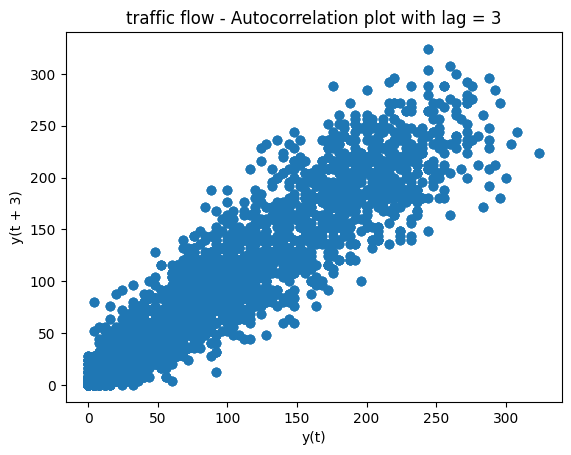

In [20]:
plt.figure()
lag_plot(data['flow'], lag=3)
plt.title('traffic flow - Autocorrelation plot with lag = 3')
plt.savefig("Corrolation.png")
plt.show()

In [7]:
print(len(train_set))
print(len(test_set))

7500
2500


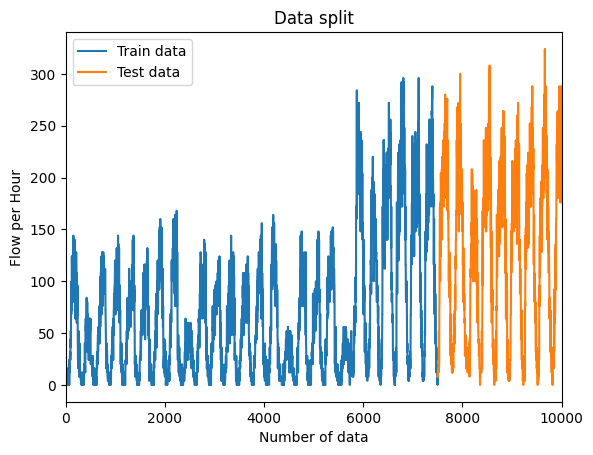

In [24]:
plt.plot(train_set['flow'].index,train_set['flow'].values,label="Train data")
plt.xlim(0,7500)
plt.plot(test_set['flow'].index, test_set['flow'].values,label="Test data")
plt.xlim(0,10000)
plt.title('Data split')
plt.xlabel('Number of data')
plt.ylabel('Flow per Hour')
plt.legend()
plt.savefig("traintestdata.png")

# Train ARIMA 

In [9]:
xtrain = train_set['flow'].values
xtest = test_set['flow'].values

In [10]:
data_set = data['flow']
data_set.head()

0    12
1    12
2    12
3    16
4    16
Name: flow, dtype: int64

In [11]:
aut_model = auto_arima(xtrain, start_p=1, start_q=1,test='adf',max_p=5, max_q=5,m=1,d=1,seasonal=False,   start_P=0, D=None, trace=True ,error_action='ignore',  suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=59989.345, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60363.685, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60365.686, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=60365.685, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60361.686, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59791.425, Time=1.72 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=60367.686, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=58803.412, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=58801.412, Time=0.41 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=58803.412, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=58805.413, Time=0.66 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=58799.412, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=60365.686, Time=0.18 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=58801.412, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0

In [12]:
history = [x for x in xtrain]
predictions = list()
for t in range(len(xtest)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = xtest[t]
    history.append(obs)



In [13]:
rmse = sqrt(mean_squared_error(xtest, predictions))
rmse

17.143042716369326

/tmp/ipykernel_20059/1300636886.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.xticks(np.arange(1260,1300,2),test_set.day[1260:1300:2],rotation = 45)


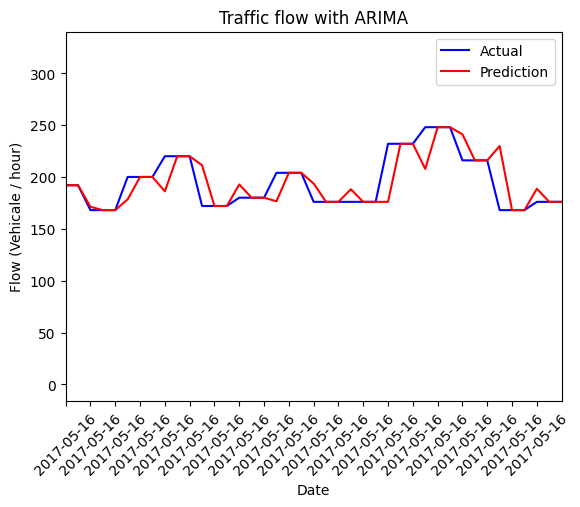

In [14]:

# plot forecasts against actual outcomes
plt.plot(xtest,color = 'blue',label = "Actual")
plt.plot(predictions, color='red', label = "Prediction")
plt.xlabel('Date')
plt.ylabel("Flow (Vehicale / hour)")
plt.title('Traffic flow with ARIMA')
plt.xlim(1260, 1300)
plt.xticks(np.arange(1260,1300,2),test_set.day[1260:1300:2],rotation = 45)
plt.legend()
plt.savefig('Actual_real.png')
plt.show()

/tmp/ipykernel_20059/4045221172.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.xticks(np.arange(0,2500,250),test_set.day[0:2500:250],rotation = 45)


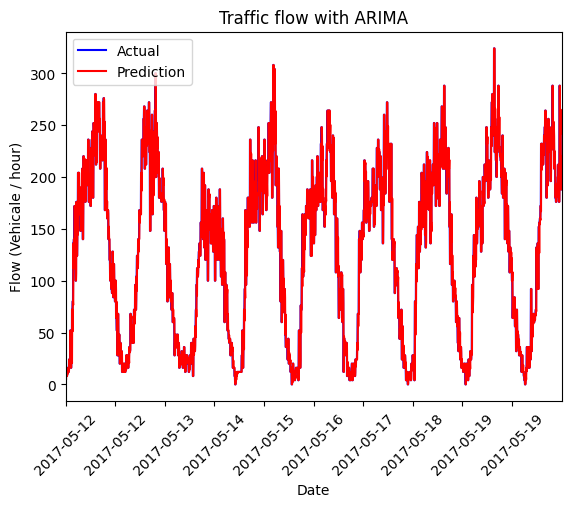

In [15]:
plt.plot(xtest,color = 'blue',label = "Actual")
plt.plot(predictions, color='red', label = "Prediction")
plt.xlabel('Date')
plt.ylabel("Flow (Vehicale / hour)")
plt.title('Traffic flow with ARIMA')
plt.xlim(0,2500)
plt.xticks(np.arange(0,2500,250), test_set.day[0:2500:250], rotation = 45)
plt.legend()
plt.savefig('total_actual_real.png')
plt.show()

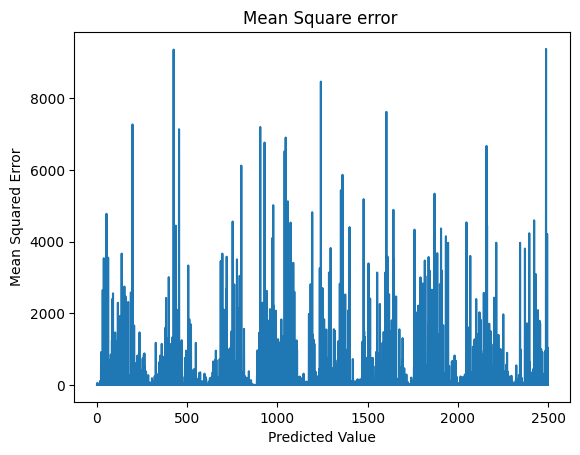

In [16]:

errors = list()
for i in range(len(xtest)):
 # calculate error
 err = (xtest[i] - predictions[i])**2
 # store error
 errors.append(err)
 # report error
# plot errors
plt.plot(errors)
plt.title('Mean Square error ')
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.savefig('MSE.png')
plt.show()

In [17]:
r2 = r2_score(xtest, predictions)
rmse = sqrt(mean_squared_error(xtest, predictions))
print('RMSE', rmse, 'R_2', r2)

RMSE 17.143042716369326 R_2 0.9559998797490895


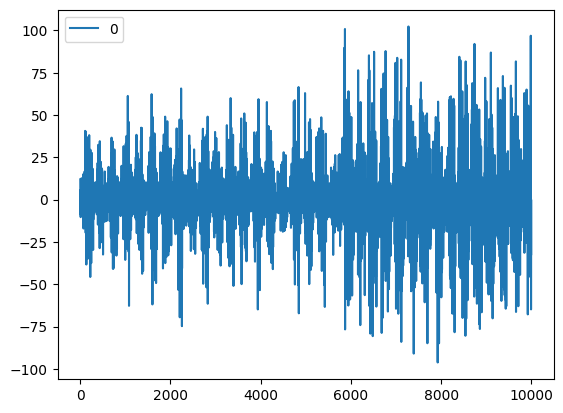

In [18]:
residuals = DataFrame(model_fit.resid) 
residuals.plot()
plt.show()

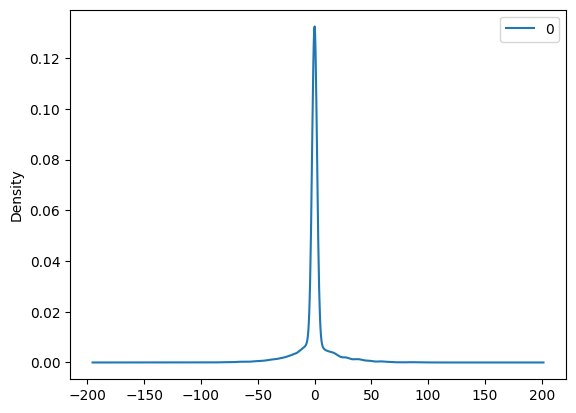

In [19]:
#we continue to check residuals
residuals.plot(kind='kde') 
plt.show()